# Blds indicators

Question: Exists any relation between the Microsoft AI buildings and selected indicators?

#### Import libs

In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob


#### Load Microsoft AI buildings data by region

In [2]:
# get the directory with downloaded data
os.chdir("..")
home_dir = os.getcwd()
data_dir = os.path.join(home_dir, "downloaded-data-json")


In [3]:
def get_json_names():

    home_dir = os.getcwd()
    json_dir = os.path.join(home_dir, f"downloaded-data-json", "")

    # Construct the file pattern
    file_pattern = os.path.join(json_dir, '*.json')
    # print(file_pattern)

    # Use glob to get the list of file names matching the pattern
    file_names = glob.glob(file_pattern)
    # print(file_names)

    # Extract the base names of the files without the extension
    names = [os.path.splitext(os.path.basename(file_name))[0]
            for file_name in file_names]
    # print(names)
    # Print the names

    return names
    

json_names = get_json_names()
json_names


['blds_africa_states_18-23_ai',
 'blds_continent_data_18-23_ai',
 'blds_northamerica_states_18-23_ai',
 'blds_world_states_18-23_ai',
 'roads_africa_states_18-23_ai',
 'roads_asia_states_18-23_ai',
 'roads_continent_data_18-23_ai',
 'roads_europe_states_18-23_ai']

In [4]:
json_dic = {k: v for k, v in enumerate(json_names)}
json_dic


{0: 'blds_africa_states_18-23_ai',
 1: 'blds_continent_data_18-23_ai',
 2: 'blds_northamerica_states_18-23_ai',
 3: 'blds_world_states_18-23_ai',
 4: 'roads_africa_states_18-23_ai',
 5: 'roads_asia_states_18-23_ai',
 6: 'roads_continent_data_18-23_ai',
 7: 'roads_europe_states_18-23_ai'}

In [5]:
# define the user input

while True:
    if bool(json_dic):
        try:
            user_d_spec = int(input(f"Which data do you want to download?\
                                Enter {json_dic}"
                                    ))
        except ValueError:
            print("Please enter a number.")
            continue
        if user_d_spec not in range(len(json_dic)):
            print(f"Please enter {len(json_dic.keys())}")
            continue
        break
    else:
        print("Geojson_dic is empty, restart the kernel, please.")
        break



In [7]:
def data_spec(data_dic):

    try:
        with open(f"downloaded-data-json\\{data_dic}.json", "r") as f:
            data = json.load(f)
        return data
    except Exception as e:
        print(e)
        print("Please download the data first.")

data = data_spec(json_dic[user_d_spec])
data


[[{'groupByObject': ['Indonesia',
    'remainder',
    'IDN',
    'Indonesia',
    'Sovereign country',
    'Indonesia',
    'Indonesia',
    'Indonesia',
    1159320845,
    270625568.0,
    17,
    2019,
    1119190,
    2019,
    '4. Emerging region: MIKT',
    '4. Lower middle income',
    'Asia',
    'Asia',
    'South-Eastern Asia',
    'East Asia & Pacific'],
   'result': [{'timestamp': '2018-01-01T00:00:00Z', 'value': 11987966.0},
    {'timestamp': '2019-01-01T00:00:00Z', 'value': 24924151.0},
    {'timestamp': '2020-01-01T00:00:00Z', 'value': 26423299.0},
    {'timestamp': '2021-01-01T00:00:00Z', 'value': 30570946.0},
    {'timestamp': '2022-01-01T00:00:00Z', 'value': 36251876.0},
    {'timestamp': '2023-01-01T00:00:00Z', 'value': 38586511.0}]},
  {'groupByObject': ['Indonesia',
    'source=microsoft/BuildingFootprints',
    'IDN',
    'Indonesia',
    'Sovereign country',
    'Indonesia',
    'Indonesia',
    'Indonesia',
    1159320845,
    270625568.0,
    17,
    2019,
   

In [8]:
header_properties = ["name_en", "source", "adm0_iso", "sovereignt", "type_", "admin", "geounit", "name", "ne_id", "pop_est",
                     "pop_rank", "pop_year", "gdp_md", "gdp_year", "economy", "income_grp", "continent", "region_un", "subregion", "region_wb",
                     "timestamp", "value"]


In [9]:
d = {k: list() for k in header_properties}
d

{'name_en': [],
 'source': [],
 'adm0_iso': [],
 'sovereignt': [],
 'type_': [],
 'admin': [],
 'geounit': [],
 'name': [],
 'ne_id': [],
 'pop_est': [],
 'pop_rank': [],
 'pop_year': [],
 'gdp_md': [],
 'gdp_year': [],
 'economy': [],
 'income_grp': [],
 'continent': [],
 'region_un': [],
 'subregion': [],
 'region_wb': [],
 'timestamp': [],
 'value': []}

In [10]:
"""
In this modified code, we check the length of the current list (d[key])
 against the length of the "timestamp" list (d["timestamp"]).
 If the current list is longer, we append the corresponding "timestamp"
 and "value" to ensure they have the same length. If the current list is shorter,
 we update the value at the corresponding index in the "timestamp" and "value" lists
 instead of appending new elements.
 
"""

for region in data:
    temp_dic = {}
    temp_keys = header_properties[0:-2]

    for dic in region:
        for idx, key in enumerate(temp_keys):
            temp_dic[key] = dic["groupByObject"][idx]

            for res in dic["result"]:
                if key not in d:
                    d[key] = []

                d[key].append(temp_dic[key])

                if len(d[key]) > len(d["timestamp"]):
                    d["timestamp"].append(res["timestamp"])
                    d["value"].append(res["value"])
                else:
                    d["timestamp"][len(d[key])-1] = res["timestamp"]
                    d["value"][len(d[key])-1] = res["value"]

df = pd.DataFrame(d)

In [7]:
df["blds_year"] = pd.to_datetime(df["timestamp"]).dt.year
df.rename(columns={"value": "num_of_blds"}, inplace=True)

In [8]:
df.dtypes


name_en         object
source          object
adm0_iso        object
sovereignt      object
type_           object
admin           object
geounit         object
name            object
ne_id            int64
pop_est        float64
pop_rank         int64
pop_year         int64
gdp_md           int64
gdp_year         int64
economy         object
income_grp      object
continent       object
region_un       object
subregion       object
region_wb       object
timestamp       object
num_of_blds    float64
blds_year        int64
dtype: object

In [9]:
sel_cols = ["name_en", "source", "adm0_iso", "pop_est",
            "gdp_md", "economy", "income_grp", "continent",
            "num_of_blds", "blds_year"]


In [10]:
df.loc[(df["name_en"] == "Nigeria") &
       ((df["source"] == "source=esri/Google_Africa_Buildings") |
        (df["source"] == "source=microsoft/BuildingFootprints")),
       sel_cols].groupby(["name_en", "source"]).sum()


C:\Users\milan\AppData\Local\Temp\ipykernel_26548\3934610226.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sel_cols].groupby(["name_en", "source"]).sum()


pop_est   gdp_md  \
name_en source                                                       
Nigeria source=esri/Google_Africa_Buildings  1.205782e+09  2688720   
        source=microsoft/BuildingFootprints  1.205782e+09  2688720   

                                             num_of_blds  blds_year  
name_en source                                                       
Nigeria source=esri/Google_Africa_Buildings        731.0      12123  
        source=microsoft/BuildingFootprints    1055041.0      12123

In [11]:
df = df.loc[(df["continent"] == "Africa") &\
            ((df["source"] == "source=esri/Google_Africa_Buildings") |
            (df["source"] == "source=microsoft/BuildingFootprints")),
            sel_cols]


In [12]:
df

,name_en,source,adm0_iso,pop_est,gdp_md,economy,income_grp,continent,num_of_blds,blds_year
222,Ethiopia,source=microsoft/BuildingFootprints,ETH,112078730.0,95912,7. Least developed region,5. Low income,Africa,0.0,2018
223,Ethiopia,source=microsoft/BuildingFootprints,ETH,112078730.0,95912,7. Least developed region,5. Low income,Africa,0.0,2019
224,Ethiopia,source=microsoft/BuildingFootprints,ETH,112078730.0,95912,7. Least developed region,5. Low income,Africa,0.0,2020
225,Ethiopia,source=microsoft/BuildingFootprints,ETH,112078730.0,95912,7. Least developed region,5. Low income,Africa,0.0,2021
226,Ethiopia,source=microsoft/BuildingFootprints,ETH,112078730.0,95912,7. Least developed region,5. Low income,Africa,0.0,2022
...,...,...,...,...,...,...,...,...,...,...
3457,Cape Verde,source=esri/Google_Africa_Buildings,CPV,549935.0,1981,6. Developing region,4. Lower middle income,Africa,0.0,2019
3458,Cape Verde,source=esri/Google_Africa_Buildings,CPV,549935.0,1981,6. Developing region,4. Lower middle income,Africa,0.0,2020
3459,Cape Verde,source=esri/Google_Africa_Buildings,CPV,549935.0,1981,6. Developing region,4. Lower middle income,Africa,0.0,2021
3460,Cape Verde,source=esri/Google_Africa_Buildings,CPV,549935.0,1981,6. Developing region,4. Lower middle income,Africa,0.0,2022


In [14]:
df_sel = df.groupby(["blds_year", "name_en", "adm0_iso"], as_index=False)[["num_of_blds", "gdp_md", "pop_est"]].sum()
df_sel

,blds_year,name_en,adm0_iso,num_of_blds,gdp_md,pop_est
0,2018,Algeria,DZA,0.0,342182,86106108.0
1,2018,Angola,AGO,0.0,177630,63650590.0
2,2018,Benin,BEN,0.0,28780,23602302.0
3,2018,Bir Tawil,-99,0.0,0,0.0
4,2018,Botswana,BWA,0.0,36680,4607394.0
...,...,...,...,...,...,...
325,2023,Tunisia,TUN,551.0,77592,23389438.0
326,2023,Uganda,UGA,69237.0,70330,88539188.0
327,2023,Western Sahara,B28,0.0,1814,1206506.0
328,2023,Zambia,ZMB,159932.0,46618,35722060.0


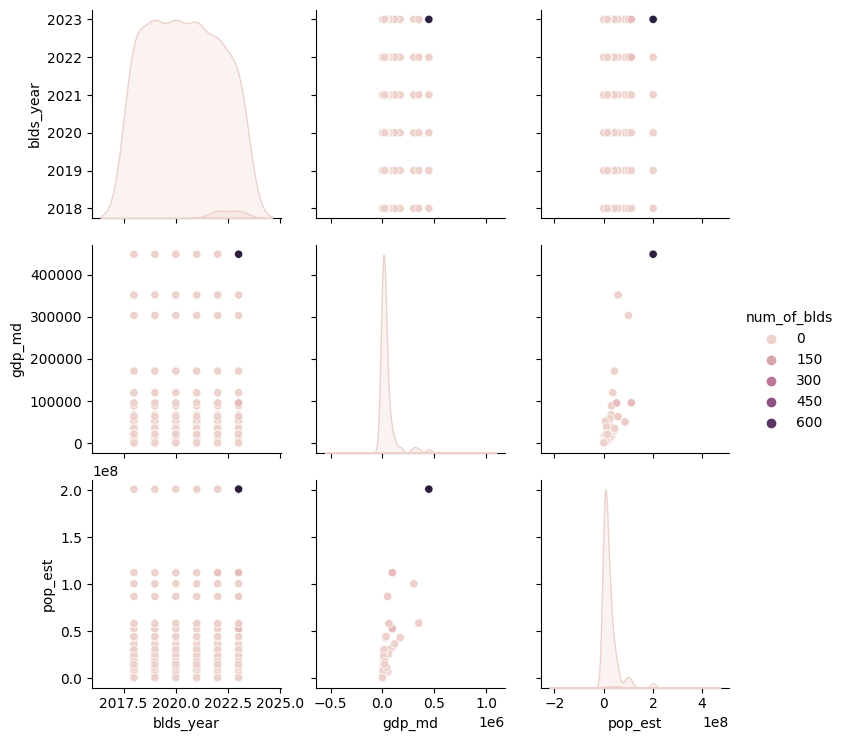

In [15]:
sns.pairplot(df_sel, hue='num_of_blds')


#### Load the indicators data (xlsx files)

In [ ]:
# merge df with region names based on IDs
# df = df.merge(id_name_df, how="left", left_on="feature",
#                right_on="id")
# df.head(20)

In [15]:
# home_dir = os.getcwd()
indicators_dir = os.path.join(home_dir, f"indicators-data", "")


In [16]:
def get_indicators_names():

    home_dir = os.getcwd()
    indicators_dir = os.path.join(home_dir, f"indicators-data", "")

    # Construct the file pattern
    file_pattern = os.path.join(indicators_dir, '*.xlsx')
    # print(file_pattern)

    # Use glob to get the list of file names matching the pattern
    file_names = glob.glob(file_pattern)
    # print(file_names)

    # Extract the base names of the files without the extension
    names = [os.path.splitext(os.path.basename(file_name))[0]
             for file_name in file_names]
    # print(names)
    # Print the names

    return names


indicators_names = get_indicators_names()
indicators_names


['cellphone_usage',
 'disaster_deaths',
 'hdi_data',
 'parliament_women_absolute',
 'population']

In [17]:
cols = ["country", 2018, 2019, 2020, 2021, 2022, 2023]


In [21]:

files = glob.glob(indicators_dir + '*.xlsx')

cols = ["country", 2018, 2019, 2020, 2021, 2022, 2023, "year", "value", "iso"]
data = {}

for file in files:
   file_name = os.path.basename(file)  # Extract the file name with extension
   # Extract the file name without extension
   df_name = os.path.splitext(file_name)[0]
   try:
      df = pd.read_excel(file, sheet_name="1")
      cols_intersection = list(set(df.columns).intersection(cols))
      df = df[cols_intersection]
      data[df_name] = df
   except:
      print(f"Error occured while reading {file_name}")


In [22]:
data['hdi_data']


,2018,2019,2020,2021,country,iso
0,0.483,0.488,0.483,0.478,Afghanistan,AFG
1,0.806,0.810,0.794,0.796,Albania,ALB
2,0.745,0.748,0.736,0.745,Algeria,DZA
3,0.872,0.873,0.848,0.858,Andorra,AND
4,0.595,0.595,0.590,0.586,Angola,AGO
...,...,...,...,...,...,...
182,0.738,0.721,0.695,0.691,Venezuela,VEN
183,0.697,0.703,0.710,0.703,Vietnam,VNM
184,0.459,0.461,0.460,0.455,Yemen,YEM
185,0.572,0.575,0.570,0.565,Zambia,ZMB


In [ ]:
df_i = data['GDL-Subnational-HDI-data']
# df_str_cols = map(lambda x: str(x), df.columns)
cols_intersection = list(set(df_i.columns).intersection(cols))
cols_intersection

[2018, 2019, 2020, 2021, 'country']

In [ ]:
data.keys()

dict_keys(['cellphone-usage', 'disaster_deaths', 'GDL-Subnational-HDI-data', 'parliament-women-absolute', 'parliament-women-percentage', 'world-state-population', 'YouthMappersChapters-List'])

In [ ]:
df_to_melt = ['cellphone-usage', 'GDL-Subnational-HDI-data', 'world-state-population']


In [ ]:
data["parliament-women-absolute"]


,country,year,value
0,Afghanistan,2018,69.0
1,Afghanistan,2020,67.0
2,Afghanistan,2021,67.0
3,Afghanistan,2022,67.0
4,Afghanistan,2023,NaN
...,...,...,...
1401,Zimbabwe,2019,86.0
1402,Zimbabwe,2020,86.0
1403,Zimbabwe,2021,86.0
1404,Zimbabwe,2022,81.0


In [ ]:
data["disaster_deaths"]


,country,year,value
0,France,2018,6.0
1,Albania,2018,NaN
2,Brazil,2018,4.0
3,Cuba,2018,9.0
4,Brazil,2018,49.0
...,...,...,...
2923,Zambia,2023,NaN
2924,Zambia,2023,2.0
2925,Zimbabwe,2023,NaN
2926,Serbia,2023,2.0


In [ ]:
melted_data = {}

for df_name in df_to_melt:
    df = data[df_name]
    df = df.melt(id_vars="country", var_name="year", value_name="value")
    melted_data[df_name] = df

In [ ]:
melted_data.keys()

dict_keys(['cellphone-usage', 'GDL-Subnational-HDI-data', 'world-state-population'])

In [ ]:
melted_data["world-state-population"]


,country,year,value
0,Afghanistan,2018,36686784
1,Albania,2018,2866376
2,Algeria,2018,41927007
3,American Samoa,2018,48424
4,Andorra,2018,75013
...,...,...,...
1325,Sub-Saharan Africa,2022,..
1326,Sub-Saharan Africa (excluding high income),2022,..
1327,Sub-Saharan Africa (IDA & IBRD countries),2022,..
1328,Upper middle income,2022,..


In [ ]:
data['YouthMappersChapters-List']


""
0
1
2
3
4
...
365
366
367
368


In [ ]:
df_i = df_i.loc[:, cols_intersection]

In [ ]:


# Reshape the dataframe using melt
df_i = df_i.melt(id_vars='country', var_name='year', value_name='value')

df_i.head(10)


,country,year,value
0,Afghanistan,2018,0.483
1,Albania,2018,0.806
2,Algeria,2018,0.745
3,Andorra,2018,0.872
4,Angola,2018,0.595
5,Antigua and Barbuda,2018,0.798
6,Argentina urban,2018,0.850
7,Armenia,2018,0.771
8,Australia,2018,0.941
9,Austria,2018,0.917


In [ ]:
data.update(melted_data)
form_data = data
del form_data['YouthMappersChapters-List']



In [ ]:
form_data.keys()


dict_keys(['cellphone-usage', 'disaster_deaths', 'GDL-Subnational-HDI-data', 'parliament-women-absolute', 'parliament-women-percentage', 'world-state-population'])

In [ ]:
df_i

,country,year,value
0,Afghanistan,2018,36686784
1,Albania,2018,2866376
2,Algeria,2018,41927007
3,American Samoa,2018,48424
4,Andorra,2018,75013
...,...,...,...
1325,Sub-Saharan Africa,2022,..
1326,Sub-Saharan Africa (excluding high income),2022,..
1327,Sub-Saharan Africa (IDA & IBRD countries),2022,..
1328,Upper middle income,2022,..


In [ ]:
df

,feature,source,timestamp,value,year,id,name
0,0,remainder,2018-01-01T00:00:00Z,284919.0,2018,0,Ethiopia
1,0,remainder,2019-01-01T00:00:00Z,350579.0,2019,0,Ethiopia
2,0,remainder,2020-01-01T00:00:00Z,395155.0,2020,0,Ethiopia
3,0,remainder,2021-01-01T00:00:00Z,470680.0,2021,0,Ethiopia
4,0,remainder,2022-01-01T00:00:00Z,629701.0,2022,0,Ethiopia
...,...,...,...,...,...,...,...
655,9,source=microsoft/BuildingFootprints,2019-01-01T00:00:00Z,0.0,2019,9,Republic of the Congo
656,9,source=microsoft/BuildingFootprints,2020-01-01T00:00:00Z,0.0,2020,9,Republic of the Congo
657,9,source=microsoft/BuildingFootprints,2021-01-01T00:00:00Z,0.0,2021,9,Republic of the Congo
658,9,source=microsoft/BuildingFootprints,2022-01-01T00:00:00Z,0.0,2022,9,Republic of the Congo


In [ ]:
form_data.keys()

dict_keys(['cellphone-usage', 'disaster_deaths', 'GDL-Subnational-HDI-data', 'parliament-women-absolute', 'parliament-women-percentage', 'world-state-population'])

In [ ]:
# # Define the common column(s) to merge on
# merge_column = ['country', 'year']

# # Merge DataFrames from the dictionary based on the specified column(s)
# merged_df = pd.DataFrame()
# for key, df in form_data.items():
#     if merged_df.empty:
#         merged_df = df
#     else:
#         merged_df = pd.merge(merged_df, df, on=merge_column, how='outer')


In [ ]:
form_data.keys()


dict_keys(['cellphone-usage', 'disaster_deaths', 'GDL-Subnational-HDI-data', 'parliament-women-absolute', 'parliament-women-percentage', 'world-state-population'])

In [ ]:
df.rename(columns={"name": "country"}, inplace=True)


In [ ]:
df

,feature,source,timestamp,value,year,id,country
0,0,remainder,2018-01-01T00:00:00Z,284919.0,2018,0,Ethiopia
1,0,remainder,2019-01-01T00:00:00Z,350579.0,2019,0,Ethiopia
2,0,remainder,2020-01-01T00:00:00Z,395155.0,2020,0,Ethiopia
3,0,remainder,2021-01-01T00:00:00Z,470680.0,2021,0,Ethiopia
4,0,remainder,2022-01-01T00:00:00Z,629701.0,2022,0,Ethiopia
...,...,...,...,...,...,...,...
655,9,source=microsoft/BuildingFootprints,2019-01-01T00:00:00Z,0.0,2019,9,Republic of the Congo
656,9,source=microsoft/BuildingFootprints,2020-01-01T00:00:00Z,0.0,2020,9,Republic of the Congo
657,9,source=microsoft/BuildingFootprints,2021-01-01T00:00:00Z,0.0,2021,9,Republic of the Congo
658,9,source=microsoft/BuildingFootprints,2022-01-01T00:00:00Z,0.0,2022,9,Republic of the Congo


In [ ]:
pd.merge(df, form_data['disaster_deaths'],
         on=["country", "year"], how="inner")


,feature,source,timestamp,value_x,year,id,country,value_y
0,0,remainder,2018-01-01T00:00:00Z,284919.0,2018,0,Ethiopia,32.0
1,0,remainder,2018-01-01T00:00:00Z,284919.0,2018,0,Ethiopia,12.0
2,0,remainder,2018-01-01T00:00:00Z,284919.0,2018,0,Ethiopia,NaN
3,0,remainder,2018-01-01T00:00:00Z,284919.0,2018,0,Ethiopia,18.0
4,0,source=microsoft/BuildingFootprints,2018-01-01T00:00:00Z,0.0,2018,0,Ethiopia,32.0
...,...,...,...,...,...,...,...,...
1155,7,source=microsoft/BuildingFootprints,2022-01-01T00:00:00Z,0.0,2022,7,Morocco,21.0
1156,7,remainder,2023-01-01T00:00:00Z,292032.0,2023,7,Morocco,11.0
1157,7,remainder,2023-01-01T00:00:00Z,292032.0,2023,7,Morocco,11.0
1158,7,source=microsoft/BuildingFootprints,2023-01-01T00:00:00Z,49025.0,2023,7,Morocco,11.0


In [ ]:
merged_data = {}
test_df = pd.DataFrame()

for key, df_i in form_data.items():
    # df_i = form_data[df_name]
    df = pd.merge(df, df_i, on=["country", "year"], how="left", suffixes=("", "_" + key))
    
    

    

In [ ]:
sel_cols = list(df.columns[7:])
sel_cols

['value_cellphone-usage',
 'value_disaster_deaths',
 'value_GDL-Subnational-HDI-data',
 'value_parliament-women-absolute',
 'value_parliament-women-percentage',
 'value_world-state-population']

In [ ]:
# Select columns where rows equal '..' and replace with NaN
selected_columns = df.loc[df.eq('..').any(axis=1)]
df[selected_columns.columns] = selected_columns.replace('..', np.nan)


In [ ]:
my_df = df.loc[(df["source"] == "source=microsoft/BuildingFootprints"), sel_cols + ["value"]]
my_df


,value_cellphone-usage,value_disaster_deaths,value_GDL-Subnational-HDI-data,value_parliament-women-absolute,value_parliament-women-percentage,value_world-state-population,value
21,NaN,32.0,0.489,212.0,38.76,111129438.0,0.0
22,NaN,12.0,0.489,212.0,38.76,111129438.0,0.0
23,NaN,NaN,0.489,212.0,38.76,111129438.0,0.0
24,NaN,18.0,0.489,212.0,38.76,111129438.0,0.0
38,NaN,31.0,NaN,195.0,41.49,NaN,0.0
...,...,...,...,...,...,...,...
1312,NaN,NaN,NaN,4.0,16.67,NaN,0.0
1348,NaN,NaN,NaN,NaN,NaN,NaN,201082.0
1395,NaN,43.0,NaN,95.0,24.05,NaN,0.0
1396,NaN,11.0,NaN,95.0,24.05,NaN,0.0


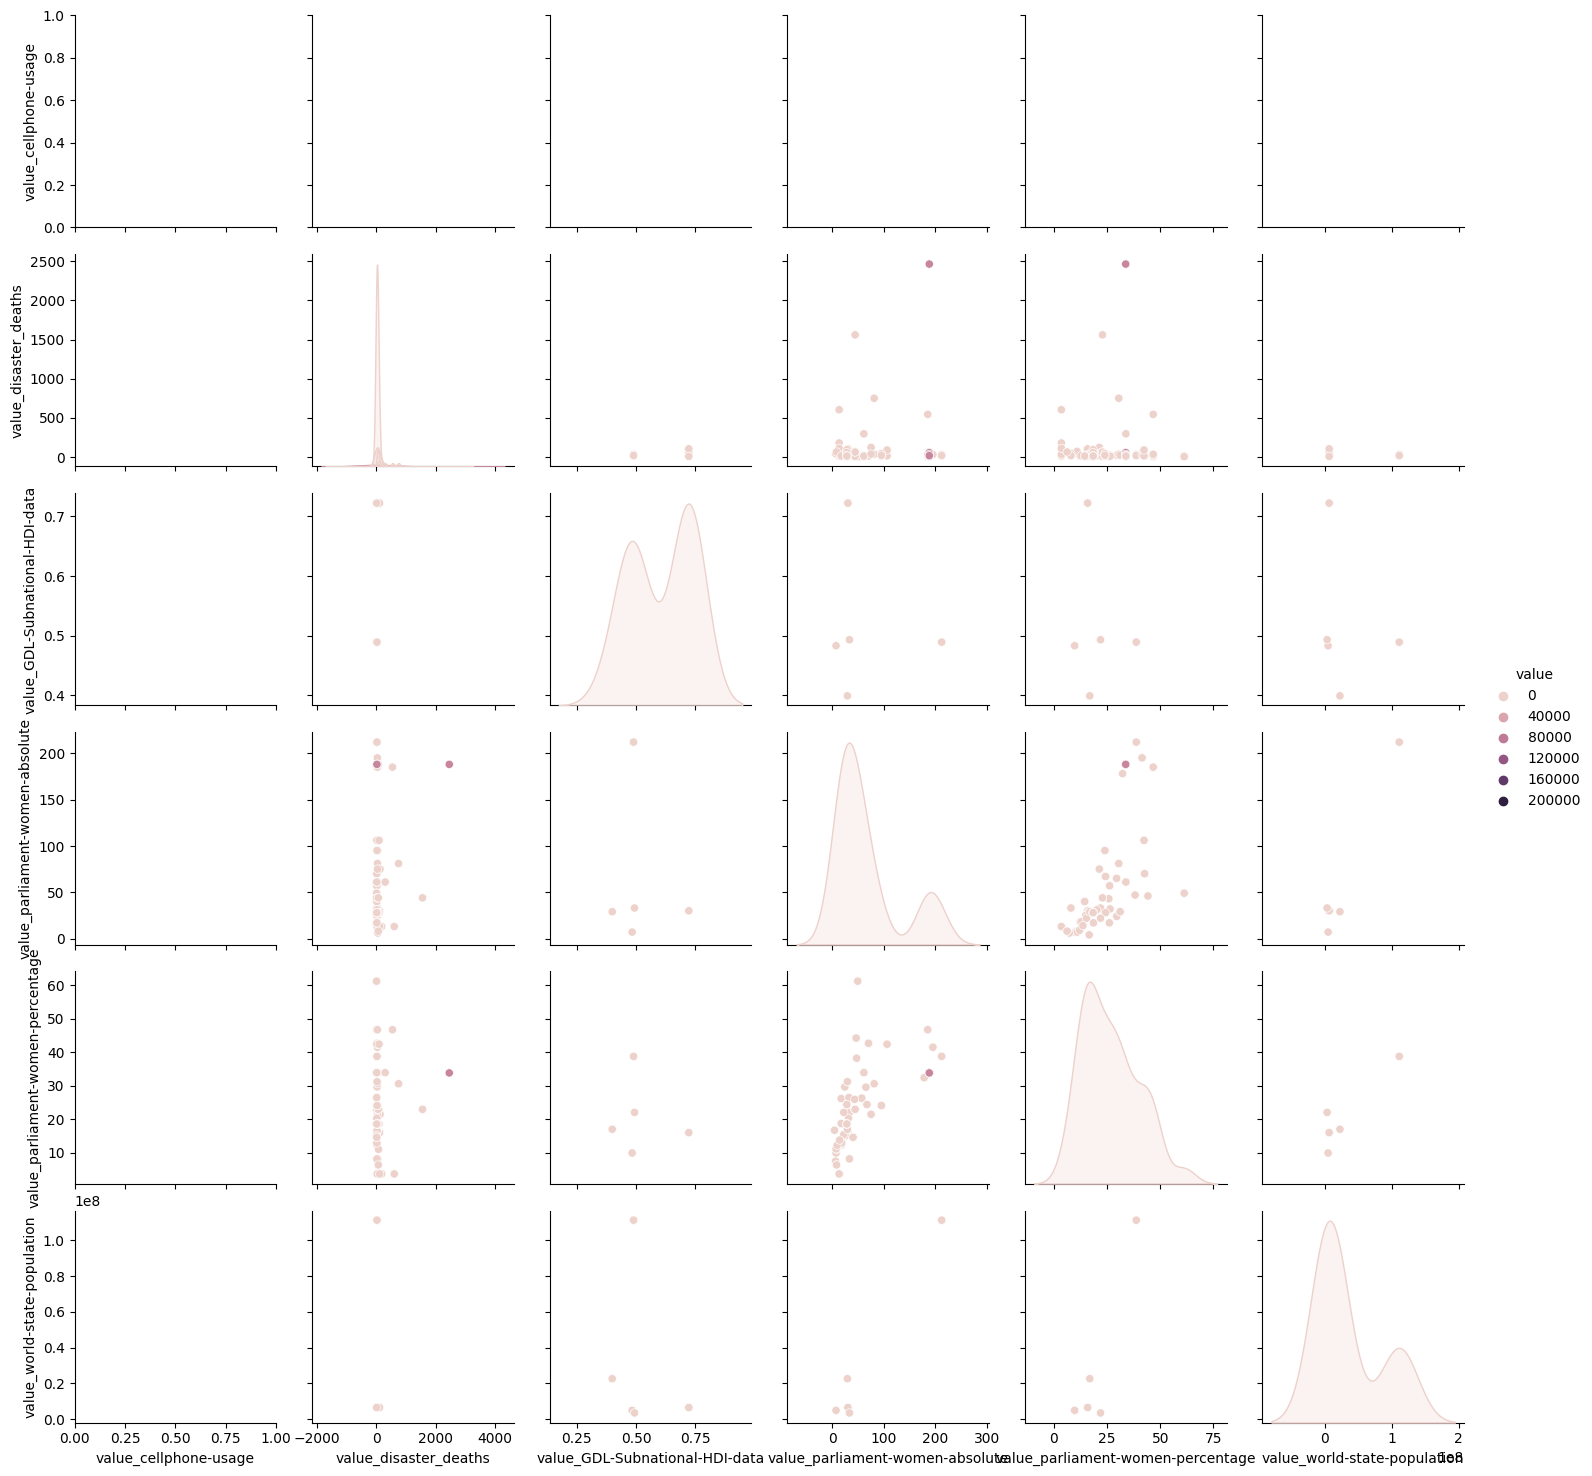

In [ ]:
sns.pairplot(my_df, hue='value')


In [ ]:
df = pd.merge(df, df_i, how="left", left_on=["name", "year"], right_on=["country", "year"])

KeyError: 'year'